<a href="https://colab.research.google.com/github/archit-8/stockmarket/blob/main/stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

project name: Stock Market Prediction And Forecasting Using Stacked LSTM

importing important packages for project

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

packages for LSTM model

# New Section

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

packages for means squared error 

In [ ]:
import math
from sklearn.metrics import mean_squared_error

reading data

In [ ]:
dataset_link="https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv"
data=pd.read_csv(dataset_link)
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


exploring data

In [ ]:
data.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [ ]:
data['Data']=pd.to_datetime(data['Date'])

In [ ]:
df=data.sort_values('Date')
df.head()


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),Data
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56,2010-07-21
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17,2010-07-22
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31,2010-07-23
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01,2010-07-26
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98,2010-07-27


In [ ]:
df.reset_index(inplace=True)

visualizing the data

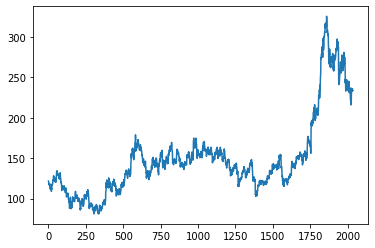

In [ ]:
plt.plot(df['Close'])

{'boxes': [<matplotlib.lines.Line2D at 0x7f8c1e46b3d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f8c1e7d4390>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f8c1e3cd6d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f8c1e3cd190>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f8c1e7c5550>,
  <matplotlib.lines.Line2D at 0x7f8c1e7d4f10>]}

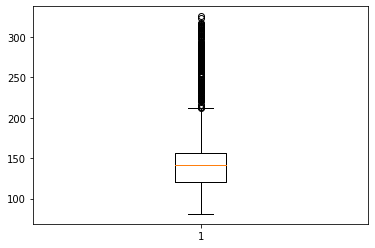

In [ ]:
plt.boxplot(df['Close'])

In [ ]:
df_close=df['Close']
df_close

0       121.55
1       120.90
2       120.65
3       117.60
4       118.65
         ...  
2030    233.30
2031    236.10
2032    234.25
2033    233.25
2034    233.75
Name: Close, Length: 2035, dtype: float64

using max and min  for scaling the attributes

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
df_close = scaler.fit_transform(np.array(df_close).reshape(-1,1))
df_close

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

spliting the data

In [ ]:
training_size = int(len(df_close)*0.70)
test_size = len(df_close) - training_size
train, test = df_close[0: training_size,:], df_close[training_size : len(df_close),:1]

In [ ]:
def create_mat(ds, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(ds)-time_step-1):
        a = ds[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(ds[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 100
X_train, y_train = create_mat(train, time_step)
X_test, y_test = create_mat(test, time_step)

In [ ]:
X_train.shape

(1323, 100)

In [ ]:
y_train.shape

(1323,)

In [ ]:
X_test.shape

(510, 100)

In [ ]:
y_test.shape

(510,)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

creating LSTM model

In [ ]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, validation_split=0.1, epochs= 60, batch_size=64, verbose = 1)

Epoch 1/60
19/19 [==============================] - 10s 248ms/step - loss: 0.0120 - val_loss: 0.0012
Epoch 2/60
19/19 [==============================] - 3s 176ms/step - loss: 0.0018 - val_loss: 0.0012
Epoch 3/60
19/19 [==============================] - 3s 175ms/step - loss: 8.9632e-04 - val_loss: 0.0011
Epoch 4/60
19/19 [==============================] - 3s 177ms/step - loss: 8.2281e-04 - val_loss: 0.0012
Epoch 5/60
19/19 [==============================] - 3s 179ms/step - loss: 8.2851e-04 - val_loss: 0.0010
Epoch 6/60
19/19 [==============================] - 3s 174ms/step - loss: 7.5899e-04 - val_loss: 9.7309e-04
Epoch 7/60
19/19 [==============================] - 3s 176ms/step - loss: 7.6338e-04 - val_loss: 9.4928e-04
Epoch 8/60
19/19 [==============================] - 3s 177ms/step - loss: 7.4501e-04 - val_loss: 8.8430e-04
Epoch 9/60
19/19 [==============================] - 3s 176ms/step - loss: 6.8948e-04 - val_loss: 8.4798e-04
Epoch 10/60
19/19 [==============================] - 3s

predictions

In [ ]:
predictions = model.predict(X_test)

In [ ]:
inv_predictions = scaler.inverse_transform(predictions)

In [ ]:
inv_predictions

array([[144.50421 ],
       [144.57922 ],
       [143.0445  ],
       [139.37613 ],
       [138.63959 ],
       [139.07    ],
       [141.29567 ],
       [142.8005  ],
       [142.00848 ],
       [140.97314 ],
       [140.9579  ],
       [143.2849  ],
       [143.86609 ],
       [145.80711 ],
       [148.28923 ],
       [143.4393  ],
       [140.93335 ],
       [142.42285 ],
       [143.92009 ],
       [151.46712 ],
       [154.73322 ],
       [154.6397  ],
       [153.7748  ],
       [150.75908 ],
       [152.49506 ],
       [152.6733  ],
       [153.4239  ],
       [155.70319 ],
       [155.47699 ],
       [154.82265 ],
       [155.54578 ],
       [153.53545 ],
       [149.2111  ],
       [142.42531 ],
       [141.00912 ],
       [141.83797 ],
       [142.37625 ],
       [140.31671 ],
       [136.62357 ],
       [132.07425 ],
       [130.59813 ],
       [130.58401 ],
       [127.92818 ],
       [127.71578 ],
       [124.85478 ],
       [121.69502 ],
       [122.202545],
       [122.3

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

 mean squared error for our model

In [ ]:
mse_error = math.sqrt(mean_squared_error(y_test, predictions))
print("The Mean Squared Error for above model is: ", mse_error)

The Mean Squared Error for above model is:  0.03211293060634582
